import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
# Covid In Westchester

Using this notebook to create a graph showing cases in westchester since the beginning of the pandemic. Data from NYTimes (https://github.com/nytimes/covid-19-data/).

# Imports

## Libraries

In [1]:
import pandas as pd
import seaborn as sns
sns.set_style("dark")
sns.set(font_scale=1.25)
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
/Users/gregfeliu/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Data

In [2]:
westchester_data = pd.read_csv("westchester_coronavirus.csv", infer_datetime_format=True, index_col=0)

westchester_data['dates_datetime'] = pd.to_datetime(westchester_data['date'], infer_datetime_format=True)

latest_date = westchester_data.iloc[-1]['date']
print(f"The latest date in this dataset is: {latest_date}")

The latest date in this dataset is: 2021-02-07


## Function to help with plotting

In [3]:
def make_lineplot(x_col, y_col, x_col_name, y_col_name, title):
    ax = sns.lineplot(data=westchester_data, x=x_col, y=y_col)
    ax.tick_params(axis='x', labelrotation = 315, size = 12)
    ax.set_xlabel(x_col_name)
    ax.set_ylabel(y_col_name)
    ax.set_title(title)
    return ax

## Plotting Data

### Plotting Total cases over time

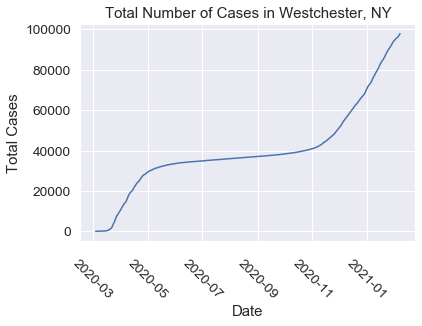

In [4]:
total_cases = make_lineplot("dates_datetime", "cases", 'Date', 'Total Cases',
                            "Total Number of Cases in Westchester, NY"
                           )
fig = total_cases.get_figure()
fig.savefig("../images/Plot_of_total_cases.png", bbox_inches='tight')

#### Plotting accumulative cases per 100k

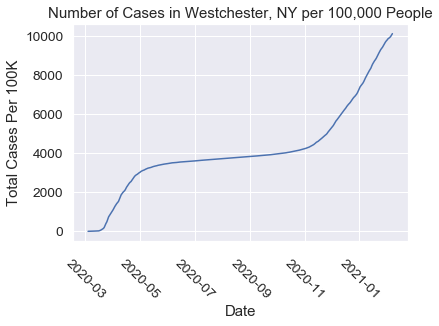

In [5]:
make_lineplot("dates_datetime", "total_cases_per_100k", 'Date', 'Total Cases Per 100K',
                            "Number of Cases in Westchester, NY per 100,000 People"
                           )

### Plotting cases per 100k over past 7 days

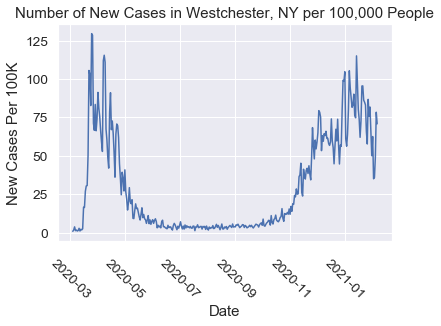

In [6]:
make_lineplot("dates_datetime", "new_cases_per_cap", 'Date', 'New Cases Per 100K',
                            "Number of New Cases in Westchester, NY per 100,000 People"
                           )

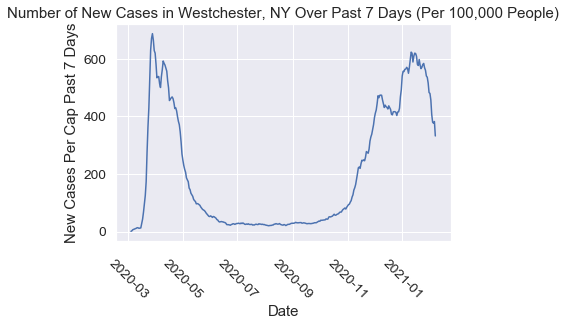

In [7]:
# this version is smoothed since it averages over 7 days
new_cases_per_cap = make_lineplot("dates_datetime", "new_cases_per_cap_past_7_days", 'Date', 
                    'New Cases Per Cap Past 7 Days',
                    "Number of New Cases in Westchester, NY Over Past 7 Days (Per 100,000 People)"
                    )
fig = new_cases_per_cap.get_figure()
fig.savefig("../images/Plot_of_New_Cases_Per_Past_7_Days.png", bbox_inches='tight')

# Examining the Data 

## Which date does the last date most resemble?

Giving context to the data by comparing it to a date in which there were a similar number of cases

In [8]:
current_number_of_new_cases = westchester_data['new_cases_per_cap_past_7_days'].iloc[-2]
# search thru the data progressively
for idx in range(len(westchester_data)):
    rows_cases = westchester_data['new_cases_per_cap_past_7_days'].iloc[idx]
    if rows_cases > current_number_of_new_cases:
        print(f"The date most similar to the current case count is: \
{westchester_data['dates_datetime'].iloc[idx]}")
        break

The date most similar to the current case count is: 2020-03-24 00:00:00


## Dates with more new cases per cap past 7 days than latest data available

In [9]:
new_cases_per_cap_last_7_days_latest_date = westchester_data['new_cases_per_cap_past_7_days'].iloc[-2]
new_cases_per_cap_last_7_days_latest_date

381.8064177379781

In [10]:
# the only days with higher new cases per cap are betwen march 22 and april 15
more_cases_per_cap_last_7_days_than_today = westchester_data \
[westchester_data['new_cases_per_cap_past_7_days'] > new_cases_per_cap_last_7_days_latest_date]

In [11]:
# The number of days since February '20 that had more cases per capita in the past 7 days than 
# the last day available
more_cases_per_cap_last_7_days_than_today.shape[0]

99

## Last week of the data 

In [12]:
westchester_data.tail(7)

,index,date,county,state,cases,deaths,total_cases_per_100k,new_cases_per_cap,new_cases_per_cap_past_7_days,dates_datetime
334,987326,2021-02-01,Westchester,New York,94697,1917.0,9787.742918,62.531912,479.376872,2021-02-01
335,990572,2021-02-02,Westchester,New York,95302,1927.0,9850.274830,35.038542,456.741354,2021-02-02
336,993818,2021-02-03,Westchester,New York,95641,1938.0,9885.313373,35.865411,405.888956,2021-02-03
337,997064,2021-02-04,Westchester,New York,95988,1948.0,9921.178783,49.198661,379.429171,2021-02-04
338,1000310,2021-02-05,Westchester,New York,96464,1952.0,9970.377445,78.345767,376.018340,2021-02-05
339,1003557,2021-02-06,Westchester,New York,97222,1966.0,10048.723212,70.800595,381.806418,2021-02-06
340,1006803,2021-02-07,Westchester,New York,97907,1971.0,10119.523807,NaN,331.780888,2021-02-07
